# AFNS模型

目前已经用R语言构建了AFNS模型，需要分析其因子是否预测。其次就是模型跟实际值的误差

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [3]:
afns_factor_df = pd.read_csv("./AFNS/AFNS_Factor.csv")
afns_factor_df['Date'] = pd.to_datetime(afns_factor_df['Date'])
afns_factor_df

,Date,Level,Slope,Curvature
0,2001-07-31,2.815252,0.427704,10.693158
1,2001-08-31,2.904878,0.191480,10.745362
2,2001-09-28,2.997567,-0.797786,11.792000
3,2001-10-31,3.051441,-1.324768,12.040893
4,2001-11-30,3.024644,-1.490063,12.623895
...,...,...,...,...
97,2009-08-31,3.946215,-4.009784,9.683754
98,2009-09-30,3.905558,-4.021701,9.828641
99,2009-10-30,3.867649,-4.020931,9.979471
100,2009-11-30,3.862124,-4.047205,10.012743


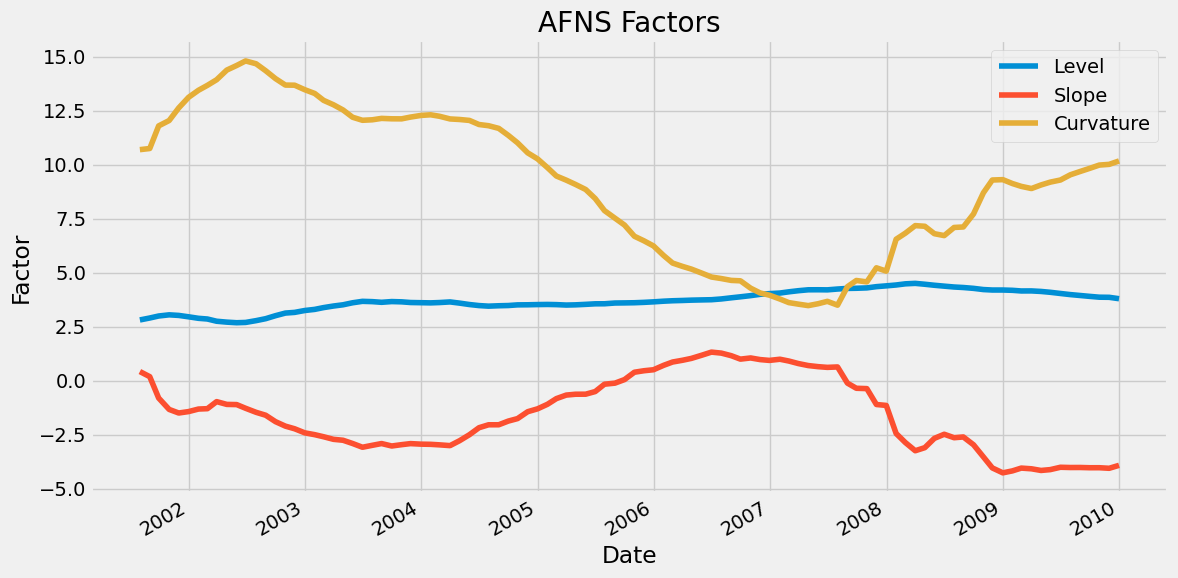

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(afns_factor_df['Date'], afns_factor_df['Level'], label="Level")
ax.plot(afns_factor_df['Date'], afns_factor_df['Slope'], label="Slope")
ax.plot(afns_factor_df['Date'], afns_factor_df['Curvature'], label="Curvature")

ax.set_title("AFNS Factors")
ax.set_xlabel("Date")
ax.set_ylabel("Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=1)

In [8]:
level_adf_result = adfuller(afns_factor_df['Level'])

print(f'ADF Statistic: {level_adf_result[0]}')
print(f'p-value: {level_adf_result[1]}')

ADF Statistic: -1.5550036029669136
p-value: 0.5061478872292545


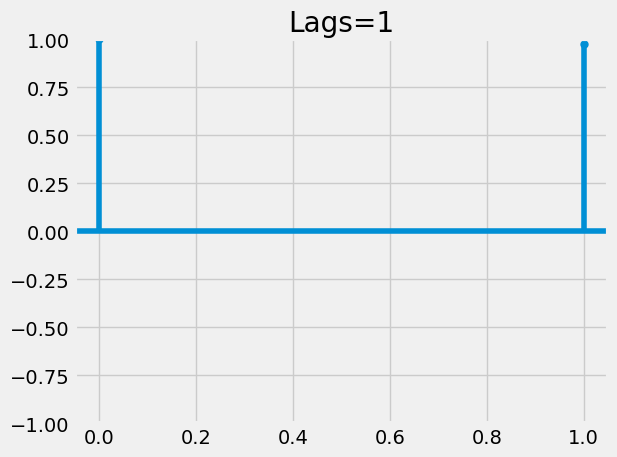

In [9]:
plot_acf(afns_factor_df['Level'], lags=1, title="Lags=1")

plt.tight_layout()

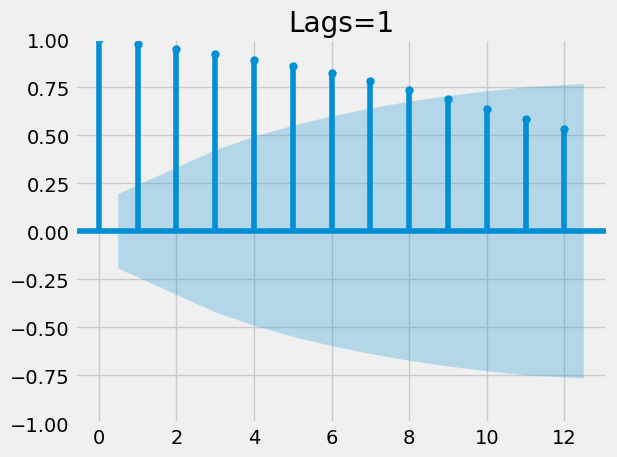

In [10]:
plot_acf(afns_factor_df['Level'], lags=12, title="Lags=1")

plt.tight_layout()

In [11]:
slope_adf_result = adfuller(afns_factor_df['Slope'])

print(f'ADF Statistic: {slope_adf_result[0]}')
print(f'p-value: {slope_adf_result[1]}')

ADF Statistic: -2.3341862923729866
p-value: 0.16117909366894984


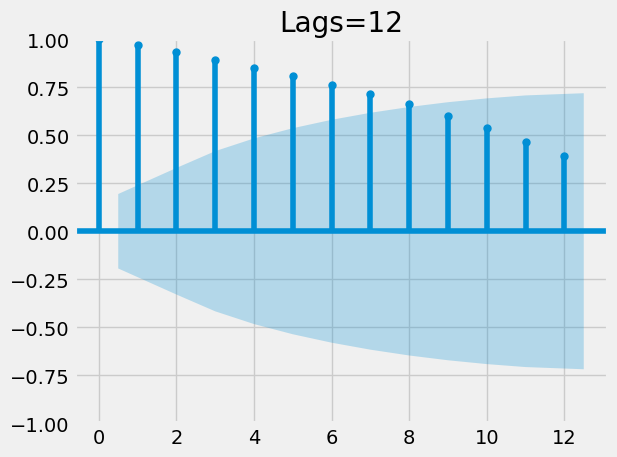

In [14]:
plot_acf(afns_factor_df['Slope'], lags=12, title="Lags=12")

plt.tight_layout()

In [13]:
curvature_adf_result = adfuller(afns_factor_df['Curvature'])

print(f'ADF Statistic: {curvature_adf_result[0]}')
print(f'p-value: {curvature_adf_result[1]}')

ADF Statistic: -2.5611266717443195
p-value: 0.10130065985823156


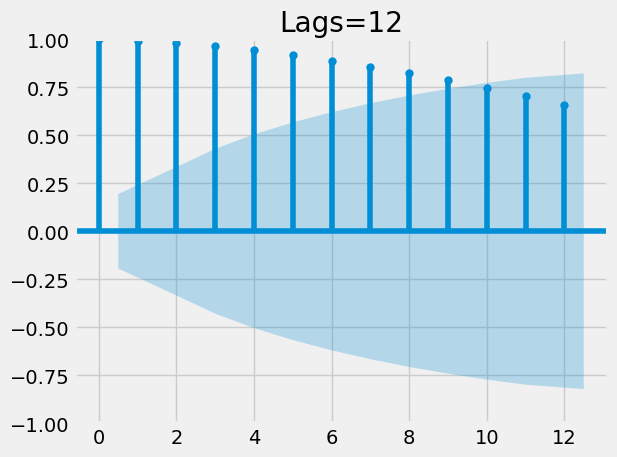

In [15]:
plot_acf(afns_factor_df['Curvature'], lags=12, title="Lags=12")

plt.tight_layout()

In [16]:
# 模型值跟实际值之间的差

real_yield_df = pd.read_csv("./AFNS/Real_Yield.csv")
real_yield_df['Date'] = pd.to_datetime(real_yield_df['Date'])
real_yield_df

,Date,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
0,2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
1,2001-08-31,3.40,3.37,3.31,3.41,3.64,3.91,4.46,4.72,4.85,5.47,5.39
2,2001-09-28,2.28,2.40,2.36,2.49,2.86,3.22,3.93,4.37,4.60,5.45,5.42
3,2001-10-31,2.15,2.05,1.95,2.07,2.44,2.87,3.66,4.03,4.30,5.05,4.89
4,2001-11-30,1.87,1.78,1.79,2.06,2.84,3.30,4.08,4.55,4.78,5.54,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...
97,2009-08-31,0.11,0.15,0.24,0.43,0.97,1.49,2.39,3.03,3.40,4.14,4.18
98,2009-09-30,0.06,0.14,0.18,0.40,0.95,1.45,2.31,2.93,3.31,4.02,4.03
99,2009-10-30,0.01,0.05,0.16,0.37,0.90,1.43,2.31,2.98,3.41,4.19,4.23
100,2009-11-30,0.08,0.06,0.15,0.27,0.67,1.12,2.01,2.69,3.21,4.07,4.20


In [17]:
model_yield_df = pd.read_csv("./AFNS/AFNS_Model_Yield.csv")
model_yield_df['Date'] = pd.to_datetime(model_yield_df['Date'])
model_yield_df

,Date,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
0,2001-07-31,3.285241,3.366728,3.481182,3.685644,4.014163,4.262009,4.603831,4.828242,5.055999,5.317123,4.937171
1,2001-08-31,3.140964,3.224816,3.342753,3.553978,3.895256,4.154906,4.517785,4.760293,5.010636,5.320290,4.965841
2,2001-09-28,2.259860,2.360380,2.502748,2.761019,3.189535,3.528017,4.026482,4.379659,4.759009,5.298807,5.026191
3,2001-10-31,1.793683,1.900561,2.052273,2.328627,2.791012,3.160530,3.713551,4.112681,4.547921,5.200286,4.980570
4,2001-11-30,1.606211,1.719207,1.879855,2.173298,2.666923,3.064101,3.663143,4.097955,4.571718,5.275801,5.057450
...,...,...,...,...,...,...,...,...,...,...,...,...
97,2009-08-31,0.018662,0.128316,0.284525,0.571039,1.057976,1.456934,2.080359,2.560923,3.130206,4.238286,4.397438
98,2009-09-30,-0.032834,0.078102,0.236178,0.526249,1.019638,1.424242,2.056873,2.544342,3.120679,4.235830,4.391979
99,2009-10-30,-0.069046,0.043115,0.202976,0.496439,0.995952,1.405877,2.047086,2.540856,3.123397,4.243297,4.394808
100,2009-11-30,-0.100345,0.012303,0.172878,0.467715,0.969767,1.381981,2.027104,2.524044,3.110239,4.236430,4.389949


In [18]:
# 计算MAPE:平均绝对百分比误差
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100



In [19]:
mape_1M = mape(real_yield_df["1M"], model_yield_df["1M"])
mape_1M

43.85027451574769

In [20]:
mape_3M = mape(real_yield_df["3M"], model_yield_df["3M"])
mape_3M

42.95005908312618

In [21]:
mape_6M = mape(real_yield_df["6M"], model_yield_df["6M"])
mape_6M

3.6256926903544624

In [22]:
mape_1Y = mape(real_yield_df["1Y"], model_yield_df["1Y"])
mape_1Y

8.737501594249775

In [23]:
mape_2Y = mape(real_yield_df["2Y"], model_yield_df["2Y"])
mape_2Y

11.941195240916471

In [24]:
mape_3Y = mape(real_yield_df["3Y"], model_yield_df["3Y"])
mape_3Y

11.720376316098708

In [32]:
columns_list = ["1M", "3M", "6M", "1Y", "2Y", "3Y", "5Y", "7Y", "10Y", "20Y", "30Y"]
mape_list = []
for temp_column in columns_list:
    temp_mape =  mape(real_yield_df[temp_column], model_yield_df[temp_column])
    mape_list.append(temp_mape)
mape_list

[43.85027451574769,
 42.95005908312618,
 3.6256926903544624,
 8.737501594249775,
 11.941195240916471,
 11.720376316098708,
 9.606983846103088,
 8.43426235210489,
 7.274971638814069,
 5.7467934839763695,
 6.33870414742848]

In [28]:
# 均方根误差
import math
def rmse(y_true, y_pred):
    MSE = np.square(np.subtract(y_true,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

In [33]:
columns_list = ["1M", "3M", "6M", "1Y", "2Y", "3Y", "5Y", "7Y", "10Y", "20Y", "30Y"]
rmse_list = []
for temp_column in columns_list:
    #print(temp_column)
    temp_rmse =  rmse(real_yield_df[temp_column], model_yield_df[temp_column]) * 100
    rmse_list.append(temp_rmse)
    print(temp_column, temp_rmse)
#rmse_list

1M 24.484485885287473
3M 12.899918966700042
6M 5.755765828878257
1Y 13.852782559695598
2Y 31.214527785038747
3Y 36.98586555223351
5Y 36.58871976545506
7Y 35.98760535641654
10Y 34.84088553953048
20Y 33.55325184681553
30Y 37.8743420606101
